In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

#VARIABLES
delta_time = 5
L=0.07
file_path = '../Out-N500-L0.07-ITER250000-POST50-wallEvents-w-0.09.txt'

sns.set_style("darkgrid")


In [85]:
#TODO: calculate delta_time as avg time in which 500 events happpen

In [86]:
#the code
latest_timestamp = 0
#Parse the .txt file
data = []  # Store the parsed data as (timestamp, velocity, container_id) tuples
with open(file_path, 'r') as file:
    lines = file.readlines()
    i = 0
    j = 0

    while i < len(lines):
        #print(lines[i])
        if j == 0 :
          readTimestamp = float(lines[i].strip())
          latest_timestamp = readTimestamp
          j = 1
        elif j == 1 :
          parts = lines[i].split()
          readVelocity = float(parts[0])
          readContainer_id = int(parts[1]) - 1
          data.append((readTimestamp, readVelocity, readContainer_id))
          j = 0

        i += 1


#Group data by container ID
container_data = {}
for timestamp, velocity, container_id in data:
    if container_id not in container_data:
        container_data[container_id] = []
    container_data[container_id].append((timestamp, velocity))

time_arrays = {}
steps = []
#Build time series
for container_id, container_values in container_data.items():
    timestamps, velocities = zip(*container_values)
    num_steps = int(latest_timestamp / delta_time)

    time_series = [(0.0) for i in range(num_steps)] #(i*delta_time, 0.0)
    steps = [(i*delta_time) for i in range(num_steps)] #build array with all time steps

    vertical_sides = 0
    if container_id == 0:
        vertical_sides = 0.09 + (0.09 - L)
    elif container_id == 1:
        vertical_sides = L

    index = int(timestamps[0] / delta_time)
    buffer = 0

    for timestamp, velocity in zip(timestamps, velocities):
        new_index = int(timestamp / delta_time)
        if index != new_index:
            sum_impulse = buffer  #sum velocities
            avg_p = sum_impulse /(delta_time*(2*0.09 + vertical_sides)) #average pressure
            #time_series[index] = buffer / number #average pressure
            time_series[index] = (avg_p)
            index = new_index
            buffer = 0

        buffer = buffer + velocity

    #print("time series ", container_id, time_series)
    time_arrays[container_id] = time_series


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205]
CONTAINER  0 [3.5190344051667855, 0.9344626838495892, 0.5196268069786188, 1.55666062265821, 2.2042620450239117, 1.742115800361338, 1.2500170682284668, 1.3577336565370703, 1.8689669121755357, 1.609186107026554, 1.4473469896389923, 1.4828808394215156, 1.7092241239841612, 1.6546829723917287, 1.5306006990694712, 1.5337985300223786, 1.5910314971320814, 1.737809961092535, 1.4415039476503402, 1.4967593070232317, 1.6866078862797051, 1.6839813094268763, 1.5484353710129781, 1.49377490882611, 1.8155655682061025, 1.5632910020983197, 1.4564875921174523, 1.4920722898687022, 1.7815304008612776, 1.498838277602197, 1.4511396844104132, 1.7363947338173953, 1.7402313030678782, 1.469231118385217, 1.5266579387857708, 1.5294698113512821, 1.5263148083438247, 1.5460291711809813, 1.6568154359379983, 1.5254653992328717, 1.5180

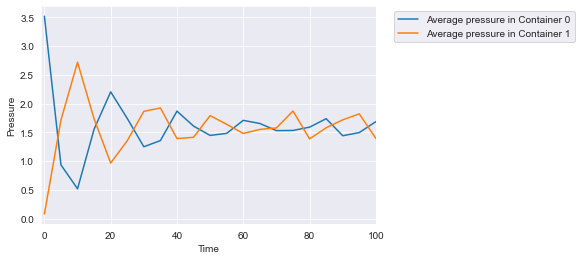

In [87]:
#Plotting
plt.tight_layout()
print(steps)
print("CONTAINER ", 0, time_arrays[0])
plt.plot(steps[:len(time_arrays[0])], time_arrays[0], label=f'Average pressure in Container {0}')

print("CONTAINER ", 1, time_arrays[1])
plt.plot(steps[:len(time_arrays[1])], time_arrays[1], label=f'Average pressure in Container {1}')

plt.xlim((-1, 100))

plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
fname = "1pressure-500-250000-w-0.09-L-0.07-dt-" + str(delta_time) + ".png"
plt.savefig(fname, bbox_inches='tight', dpi=300)
plt.show()